#### COVID-19 in India with Matplotlib

In [43]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline
plt.style.use('fivethirtyeight')

# This command builds plots in higher resolution
plt.rcParams['figure.dpi'] = 70

# Covid-19 Dataset has been sourced from GitHub
# https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv
# https://github.com/datasets/covid-19

In [44]:
covid = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv')
#covid.head()
#covid.shape
#covid.dtypes
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144256 entries, 0 to 144255
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       144256 non-null  object
 1   Country    144256 non-null  object
 2   Confirmed  144256 non-null  int64 
 3   Recovered  144256 non-null  int64 
 4   Deaths     144256 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 5.5+ MB


In [45]:
# Date is object type, need to conver it to datetime format
import matplotlib.dates as mdates
covid1 = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv', 
                     parse_dates = ['Date'])
covid1.dtypes
# covid1.head()

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
dtype: object

In [46]:
# Sum of total cases -> creating a new column
covid1['Total Confirmed'] = covid1[['Confirmed', 'Recovered', 'Deaths']].sum(axis = 1)
covid1.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Confirmed
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


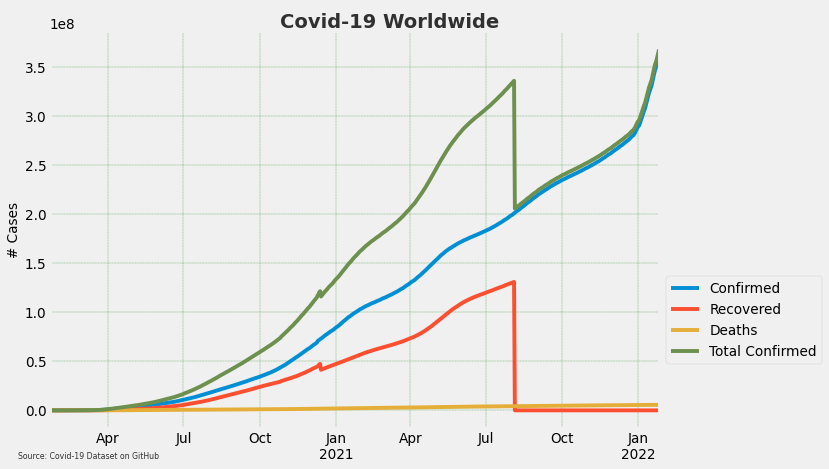

In [47]:
# Plotting for wordlwide cases 
worldwide = covid1.groupby(['Date']).sum()
c = worldwide.plot(figsize = (10, 7))
c.set_xlabel('Month', fontdict = {'fontsize' : 14, 'fontweight' : 1})
c.set(xlabel = None)
c.set_ylabel('# Cases', fontdict = {'fontsize' : 14, 'fontweight' : 1})
# c.title.set_text('Covid-19 Worldwide')

c.text(x=.40, y=.90, s="Covid-19 Worldwide", transform=fig.transFigure, 
       ha='left', fontsize=20, weight='bold', alpha=.8)

# c.text(x=.04, y=.925, s="2020 GDP, trillions of USD", 
# transform=fig.transFigure, ha='left', fontsize=11, alpha=.8)

plt.grid(color = 'green', linestyle = '--', linewidth = 0.3)

        
plt.legend(bbox_to_anchor=(1.0, 0.4))
#plt.ticklabel_format(useOffset = False)

# Set source text
c.text(x =.025, y =.022, s ="""Source: Covid-19 Dataset on GitHub""", 
       transform = fig.transFigure, ha = 'left', fontsize = 8, alpha = .8)

#c.set_facecolor("1")

plt.show()

# c.xaxis.set_tick_params(labeltop=True,      # Put x-axis labels on top
                         #labelbottom=False,  # Set no x-axis labels on bottom
                         #bottom=False,       # Set no ticks on bottom
                         #labelsize=11,       # Set tick label size
                         #pad=-1)             # Lower tick labels a bit
                
# c.yaxis.set_tick_params(pad=100,            # Pad tick labels so they don't go over y-axis
                         #labelsize=11,       # Set label size
                         #bottom=False)       # Set no ticks on bottom/left
        
# Remove spines
#c.spines[['top','right','bottom']].set_visible(False)

#Make left spine slightly thicker
#c.spines['left'].set_linewidth(1.1)
#c.spines['left'].set_linewidth(1.1)

In [48]:
India = covid1[covid1['Country'] =='India'].groupby(['Date']).sum()
India.head()

,Confirmed,Recovered,Deaths,Total Confirmed
Date,,,,
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,0,0,0,0
2020-01-25,0,0,0,0
2020-01-26,0,0,0,0


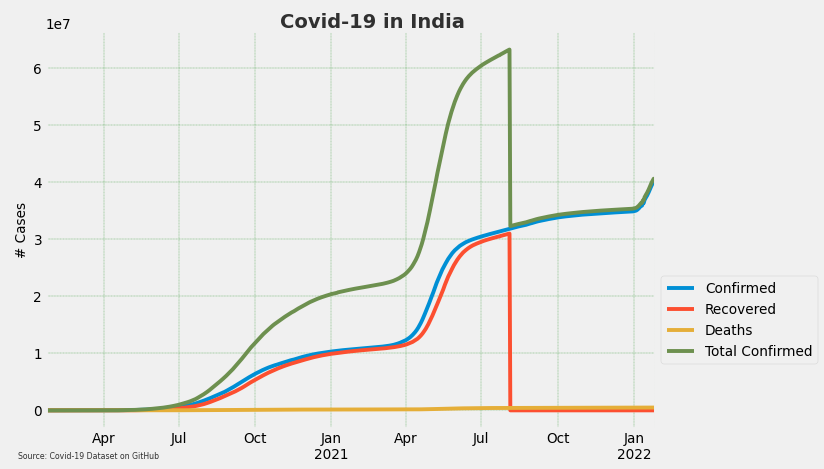

In [49]:
I = India.plot(figsize = (10, 7))
I.set_xlabel('Month', fontdict = {'fontsize' : 14, 'fontweight' : 1})
I.set(xlabel = None)
I.set_ylabel('# Cases', fontdict = {'fontsize' : 14, 'fontweight' : 1})
#I.title.set_text('Covid-19 Cases in India')

I.text(x=.40, y=.90, s="Covid-19 in India", transform=fig.transFigure, 
       ha='left', fontsize=20, weight='bold', alpha=.8)

plt.grid(color = 'green', linestyle = '--', linewidth = 0.3)

plt.legend(bbox_to_anchor=(1.0, 0.4))

I.text(x =.025, y =.022, s ="""Source: Covid-19 Dataset on GitHub""", 
       transform = fig.transFigure, ha = 'left', fontsize = 8, alpha = .8)

plt.show()

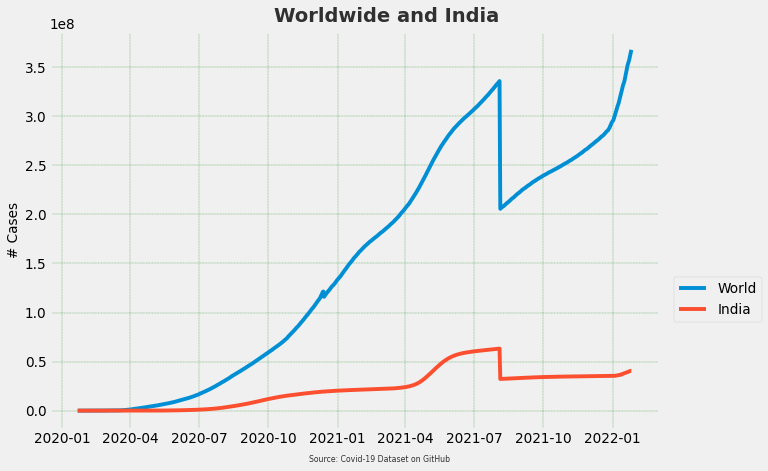

In [50]:
fig = figure(figsize = (10, 7))
ax = fig.add_subplot(111)

ax.plot(worldwide[['Total Confirmed']], label = 'World')
ax.plot(India[['Total Confirmed']], label = 'India')
ax.set_xlabel('Month', fontdict = {'fontsize' : 14, 'fontweight' : 1})
ax.set(xlabel = None)
ax.set_ylabel('# Cases', fontdict = {'fontsize' : 14, 'fontweight' : 1})
# ax.title.set_text('Worldwide | India Covid-19 Cases')

ax.text(x=.40, y=.90, s="Worldwide and India", transform=fig.transFigure, 
       ha='left', fontsize=20, weight='bold', alpha=.8)

plt.legend()

plt.grid(color = 'green', linestyle = '--', linewidth = 0.3)

plt.legend(bbox_to_anchor=(1.18, 0.4))

ax.text(x =.45, y =.0020, s ="""Source: Covid-19 Dataset on GitHub""", 
       transform = fig.transFigure, ha = 'left', fontsize = 8, alpha = .8)

plt.show()

In [51]:
USA = covid1[covid1['Country'] =='US'].groupby(['Date']).sum()
Brazil = covid1[covid1['Country'] =='Brazil'].groupby(['Date']).sum()

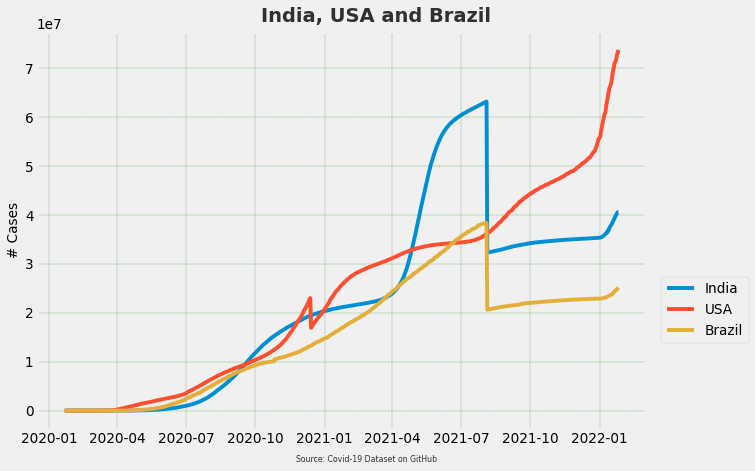

In [52]:
fig = figure(figsize = (10, 7))
ax = fig.add_subplot(111)

# ax.plot(worldwide[['Total Confirmed']], label = 'Worldwide')
ax.plot(India[['Total Confirmed']], label = 'India')
ax.plot(USA[['Total Confirmed']], label = 'USA')

ax.plot(Brazil[['Total Confirmed']], label = 'Brazil')
ax.set_xlabel('Month', fontdict = {'fontsize' : 14, 'fontweight' : 1})
ax.set(xlabel = None)

ax.text(x=.40, y=.90, s="India, USA and Brazil", transform=fig.transFigure, 
       ha='left', fontsize=20, weight='bold', alpha=.8)

ax.set_ylabel('# Cases', fontdict = {'fontsize' : 14, 'fontweight' : 1})
#ax.title.set_text('India | USA | Brazil Covid-19 Cases')

plt.legend()
plt.grid(color = 'green', linestyle = '--', linewidth = 0.3)

plt.legend(bbox_to_anchor=(1.18, 0.4))

ax.text(x =.45, y =.0020, s ="""Source: Covid-19 Dataset on GitHub""", 
       transform = fig.transFigure, ha = 'left', fontsize = 8, alpha = .8)

plt.show()

In [53]:
# Thank You :) 